In [1]:
import kagglehub

path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /Users/abhaypratapsingh/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1


In [24]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(path)

/Users/abhaypratapsingh/.cache/kagglehub/datasets/taweilo/loan-approval-classification-data/versions/1


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns

In [4]:
for file in os.listdir(path):
    df=pd.read_csv(path+'/'+file)

In [31]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [51]:
df_age=df[df['person_age']>100]

In [72]:
df_age.count()

person_age                        7
person_gender                     7
person_education                  7
person_income                     7
person_emp_exp                    7
person_home_ownership             7
loan_amnt                         7
loan_intent                       7
loan_int_rate                     7
loan_percent_income               7
cb_person_cred_hist_length        7
credit_score                      7
previous_loan_defaults_on_file    7
loan_status                       7
dtype: int64

In [53]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [7]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [8]:
def feature_classification(df):
    categorical_feature=[]
    non_categorical=[]
    continuous=[]
    discrete=[]


    for column in df.columns:
        if df[column].dtype=="object":
            if df[column].nunique() < 10:
                categorical_feature.append(column)
            else:
                non_categorical.append(column)


        elif df[column].dtype in ("float64","int64"):
            if df[column].nunique() < 30:
                discrete.append(column)


            else:
                continuous.append(column)



    return categorical_feature,non_categorical,continuous,discrete
        
    

In [9]:
categorical_f,non_categorical_f,continuous_f,discrete=feature_classification(df)

In [10]:
print("categorical_features are ",categorical_f)
print("non_categorical_features are ",non_categorical_f)
print("Continuous_Features are are ",continuous_f)
print("Discrete features are ", discrete)

categorical_features are  ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
non_categorical_features are  []
Continuous_Features are are  ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'credit_score']
Discrete features are  ['cb_person_cred_hist_length', 'loan_status']


In [11]:
for i in continuous_f:
    print(i)

person_age
person_income
person_emp_exp
loan_amnt
loan_int_rate
loan_percent_income
credit_score


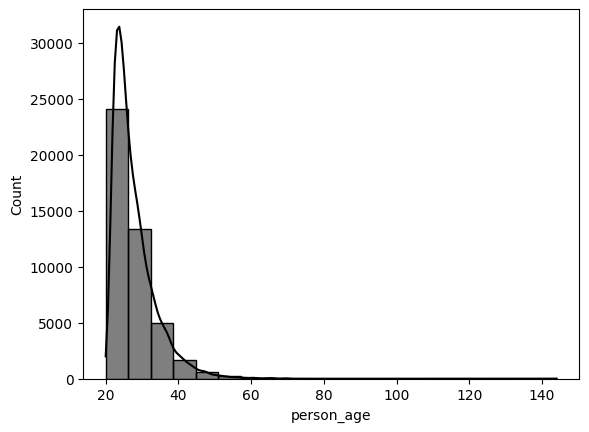

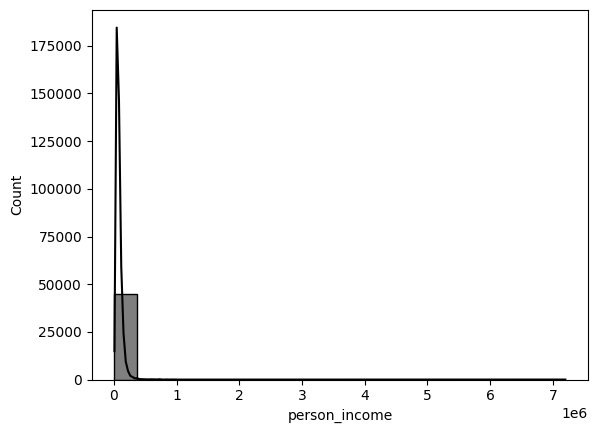

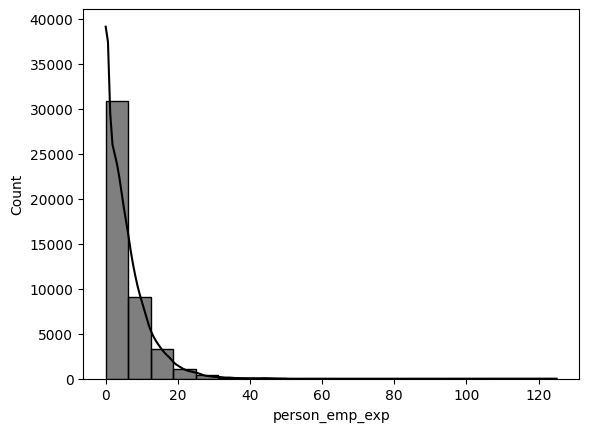

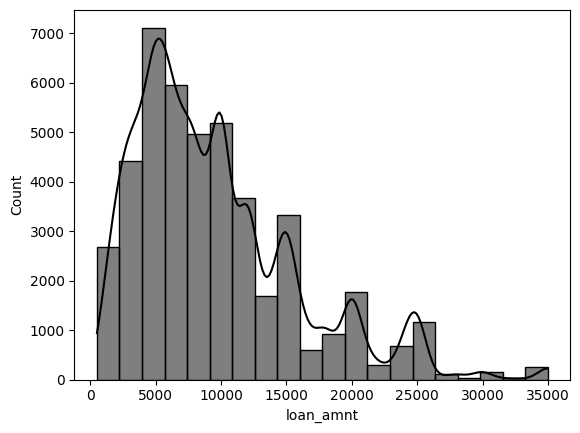

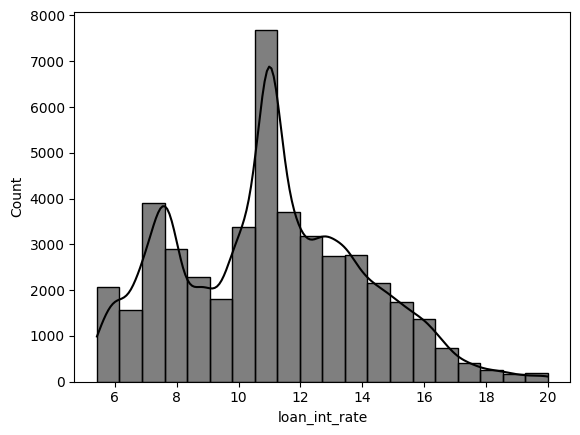

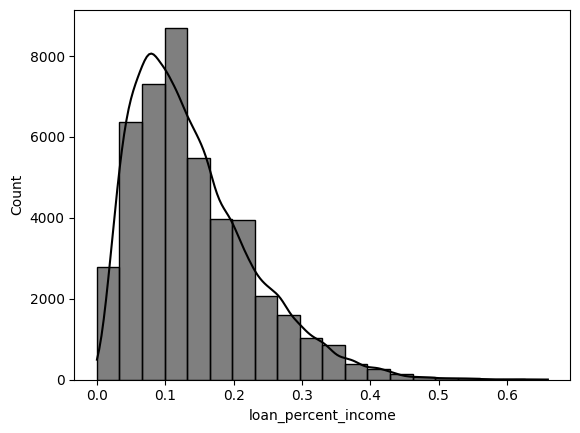

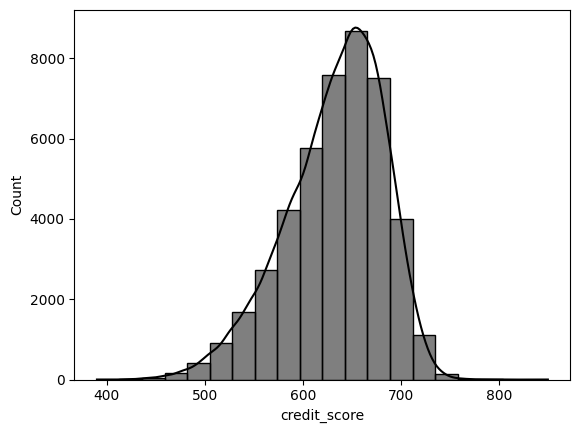

In [25]:
for i in continuous_f:
    #plt.figure()
    sns.histplot(df[i],bins=20,kde=True,palette='hls',color='black')
    #plt.xticks(rotation=90)
    plt.show()

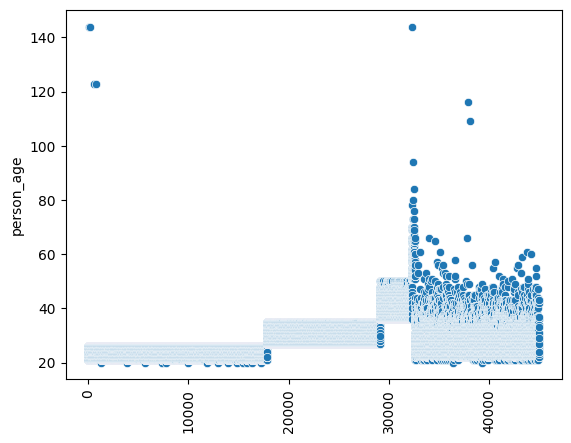

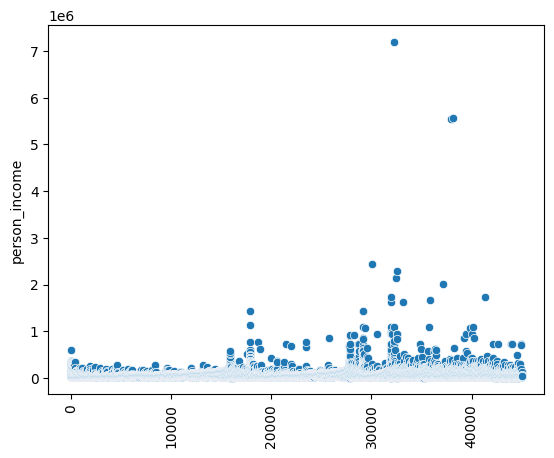

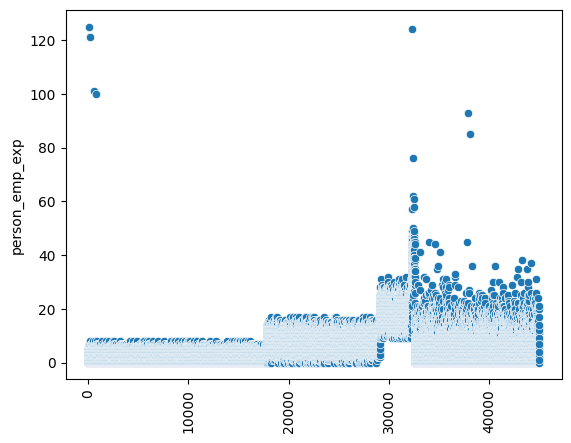

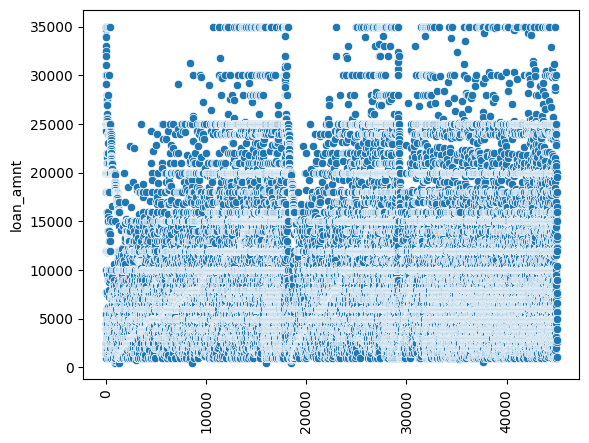

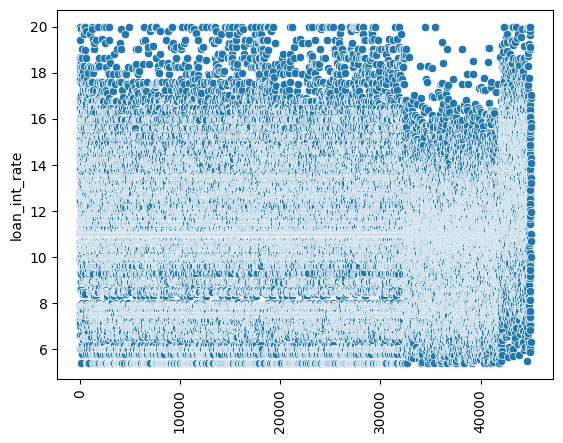

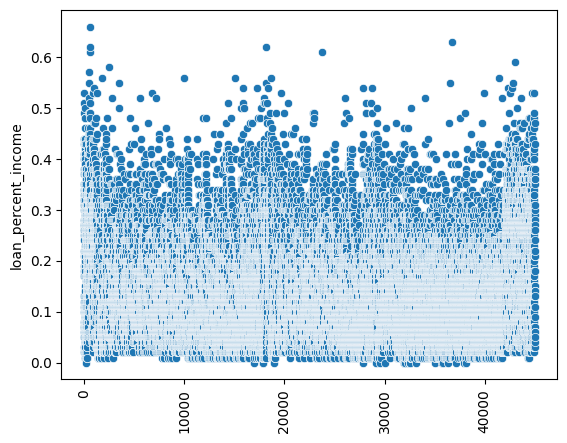

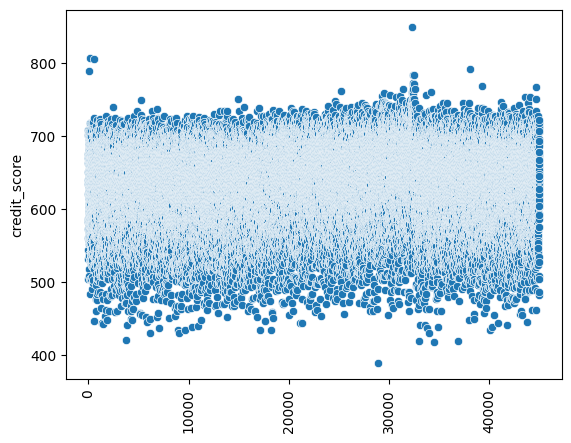

In [29]:
for i in continuous_f:
    sns.scatterplot(df[i])
    plt.xticks(rotation=90)
    plt.show()

In [54]:
df['person_income']

0        71948.0
1        12282.0
2        12438.0
3        79753.0
4        66135.0
          ...   
44995    47971.0
44996    65800.0
44997    56942.0
44998    33164.0
44999    51609.0
Name: person_income, Length: 45000, dtype: float64

<Axes: xlabel='person_income', ylabel='Count'>

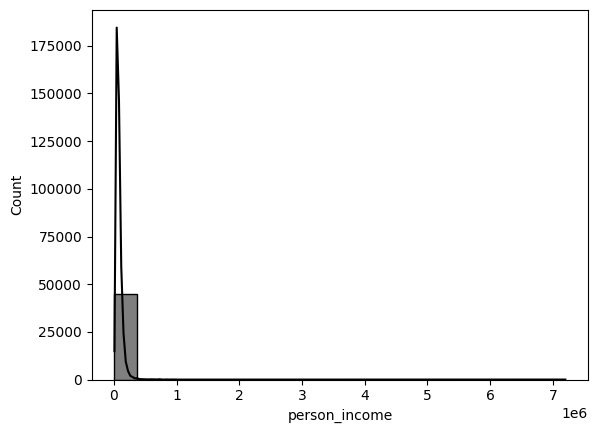

In [56]:
sns.histplot(df['person_income'],bins=20,kde=True,palette='hls',color='black')

In [60]:
df['person_income'].describe()

count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64

In [67]:
df_income=df['person_income']

In [69]:
#print(df_income.quantile(['0.25','0.50','0.75']))

In [71]:
df.head(100)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23.0,male,Associate,145092.0,0,RENT,25600.0,EDUCATION,12.69,0.18,3.0,557,Yes,0
96,24.0,female,Bachelor,15928.0,1,OWN,1600.0,MEDICAL,13.57,0.10,3.0,689,Yes,0
97,22.0,male,Bachelor,73131.0,3,RENT,25475.0,VENTURE,10.99,0.35,3.0,681,No,1
98,25.0,male,Master,281501.0,4,MORTGAGE,20000.0,MEDICAL,14.27,0.07,4.0,623,Yes,0


In [74]:
X=df.drop(['loan_status'],axis=1)

In [84]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['person_gender'] = le.fit_transform(X_train)


ValueError: y should be a 1d array, got an array of shape (36000, 13) instead.

In [75]:
Y=df['loan_status']

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [81]:
model=LogisticRegression()

In [83]:
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'male'